#1.a

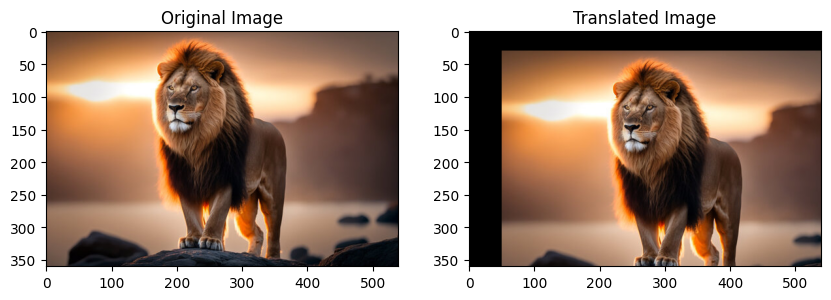

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def translate_image(image, tx, ty):
    rows, cols = image.shape[:2]
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, M, (cols, rows))
    return translated_image
image = cv2.imread('/content/drive/MyDrive/LABORATORY /lionimg.jpg')
tx, ty = 50, 30
translated_image = translate_image(image, tx, ty)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Translated Image')
plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
plt.show()

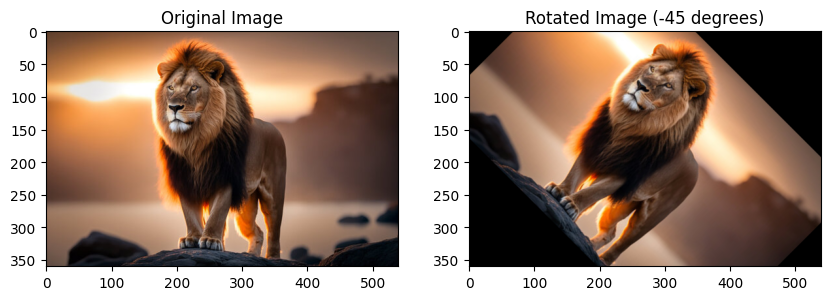

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def rotate_image(image, angle_deg):
    rows, cols = image.shape[:2]
    center = (cols / 2, rows / 2)
    M = cv2.getRotationMatrix2D(center, angle_deg, 1)
    rotated_image = cv2.warpAffine(image, M, (cols, rows))
    return rotated_image
image = cv2.imread('/content/drive/MyDrive/LABORATORY /lionimg.jpg')
angle_deg = -45
rotated_image = rotate_image(image, angle_deg)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title(f'Rotated Image ({angle_deg} degrees)')
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.show()

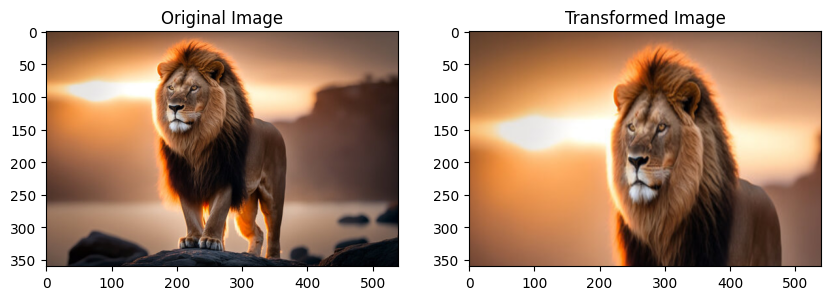

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def affine_transform_image(image, matrix):
    rows, cols = image.shape[:2]
    transformed_image = cv2.warpAffine(image, matrix, (cols, rows))
    return transformed_image

image = cv2.imread("/content/drive/MyDrive/LABORATORY /lionimg.jpg")
matrix = np.float32([[1.3, 0, 0],[0, 1.7, 0]])
transformed_image = affine_transform_image(image, matrix)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Transformed Image')
plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
plt.show()

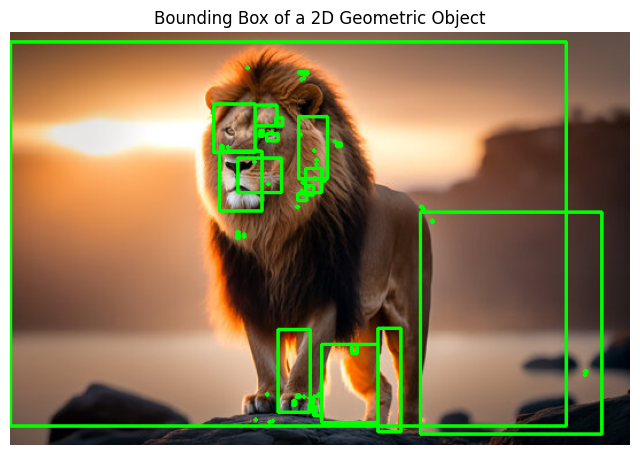

Bounding Boxes: [(225, 339, 1, 1), (228, 338, 1, 1), (213, 337, 1, 1), (264, 326, 2, 8), (260, 324, 1, 5), (246, 321, 2, 4), (260, 318, 1, 1), (264, 317, 7, 17), (255, 317, 1, 1), (249, 316, 3, 2), (268, 315, 1, 1), (223, 315, 1, 1), (500, 298, 1, 1), (500, 295, 2, 1), (297, 272, 5, 8), (271, 272, 49, 68), (233, 259, 28, 72), (320, 258, 20, 90), (203, 176, 1, 3), (197, 174, 2, 6), (367, 164, 1, 2), (357, 157, 158, 193), (359, 154, 1, 2), (357, 152, 2, 1), (249, 152, 2, 1), (257, 142, 1, 1), (250, 141, 8, 6), (255, 139, 1, 2), (253, 138, 1, 1), (257, 134, 7, 8), (224, 132, 1, 1), (254, 131, 1, 1), (273, 129, 1, 1), (264, 127, 2, 2), (257, 119, 14, 21), (266, 115, 1, 1), (212, 113, 1, 1), (266, 111, 1, 1), (198, 110, 38, 30), (182, 104, 37, 52), (264, 103, 1, 1), (213, 102, 1, 2), (189, 100, 1, 1), (183, 99, 2, 4), (284, 97, 4, 3), (282, 95, 1, 1), (252, 89, 1, 1), (223, 89, 10, 6), (227, 87, 1, 1), (217, 86, 3, 5), (231, 75, 6, 7), (251, 74, 25, 54), (213, 64, 19, 18), (177, 63, 36, 42)

In [ ]:
import cv2
import matplotlib.pyplot as plt
def bounding_box_image(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    bounding_boxes = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        bounding_boxes.append((x, y, w, h))
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Bounding Box of a 2D Geometric Object')
    plt.axis('off')
    plt.show()
    return image, bounding_boxes

image_with_boxes, bounding_boxes = bounding_box_image("/content/drive/MyDrive/LABORATORY /lionimg.jpg")
print("Bounding Boxes:", bounding_boxes)

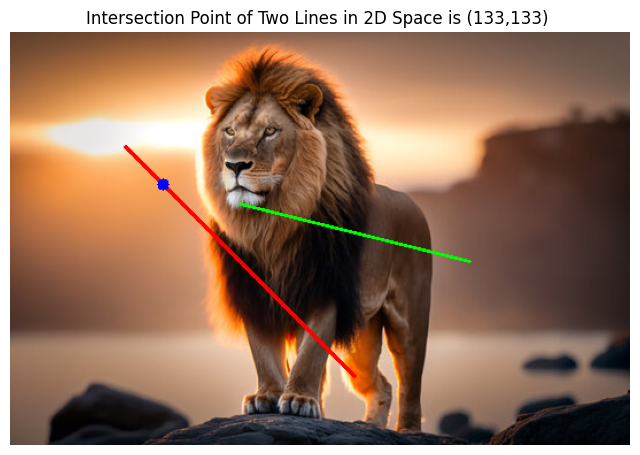

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def intersection_point_image(image_path, line1, line2):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.line(image, line1[0], line1[1], (0, 0, 255), 2)
    cv2.line(image, line2[0], line2[1], (0, 255, 0), 2)
    x1, y1 = line1[0]
    x2, y2 = line1[1]
    x3, y3 = line2[0]
    x4, y4 = line2[1]
    determinant = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if determinant == 0:
        print("Lines are parallel and do not intersect")
        return
    intersection_x = int(((x1*y2 - y1*x2) * (x3 - x4) - (x1 - x2) * (x3*y4 - y3*x4)) / determinant)
    intersection_y = int(((x1*y2 - y1*x2) * (y3 - y4) - (y1 - y2) * (x3*y4 - y3*x4)) / determinant)
    cv2.circle(image, (intersection_x, intersection_y), 5, (255, 0, 0), -1)
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Intersection Point of Two Lines in 2D Space is ({},{}) '.format(intersection_x,intersection_y))
    plt.axis('off')
    plt.show()
image_path =r"/content/drive/MyDrive/LABORATORY /lionimg.jpg"
line1 = ((100, 100), (300, 300))
line2 = ((200, 150), (400, 200))
intersection_point_image(image_path, line1, line2)

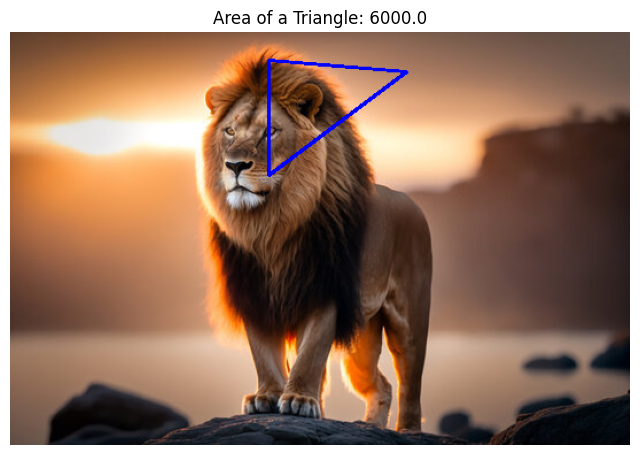

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def area_triangle_image(image_path, points):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.polylines(image, [np.array(points, np.int32)], isClosed=True, color=(255, 0, 0), thickness=2)
    x1, y1 = points[0]
    x2, y2 = points[1]
    x3, y3 = points[2]
    area = 0.5 * np.abs(x1*(y2 - y3) + x2*(y3 - y1) + x3*(y1 - y2))
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Area of a Triangle: {area}')
    plt.axis('off')
    plt.show()
image_path=r"/content/drive/MyDrive/LABORATORY /lionimg.jpg"
triangle = [(225, 25), (225,125), (345,35)]
area_triangle_image(image_path, triangle)

Projected 2D Point: (6.0, 8.0)


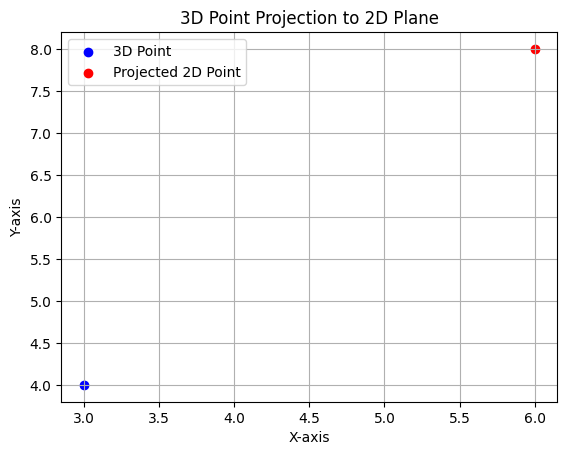

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def perspective_projection(point3d, focal_length):
    x, y, z = point3d
    projected_x = focal_length * x / z
    projected_y = focal_length * y / z

    return projected_x, projected_y

point3d = (3, 4, 5)
focal_length = 10
projected_point = perspective_projection(point3d, focal_length)
print("Projected 2D Point:", projected_point)
fig, ax = plt.subplots()
ax.scatter([point3d[0]], [point3d[1]], c='blue', label='3D Point')
ax.scatter([projected_point[0]], [projected_point[1]], c='red', label='Projected 2D Point')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('3D Point Projection to 2D Plane')
ax.legend()
plt.grid(True)
plt.show()

#1.b

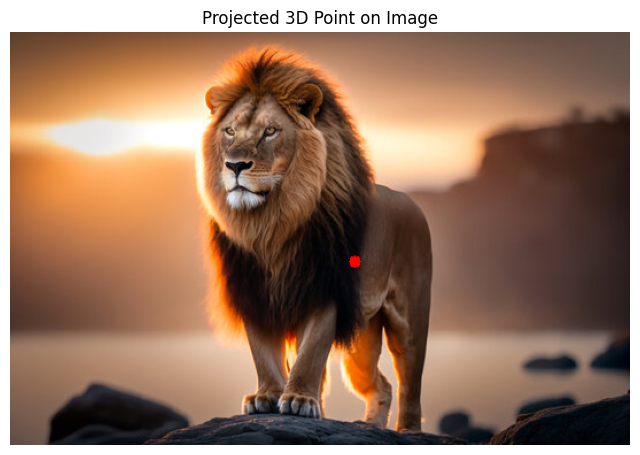

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def project_and_mark(image_path, point3d, focal_length):
    image = cv2.imread(image_path)
    x, y, z = point3d
    projected_x = int(focal_length * x / z)
    projected_y = int(focal_length * y / z)
    cv2.circle(image, (projected_x, projected_y), 5, (0, 0, 255), -1)
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Projected 3D Point on Image')
    plt.axis('off')
    plt.show()
image_path = "/content/drive/MyDrive/LABORATORY /lionimg.jpg"
point3d = (300, 200, 500)
focal_length = 500
project_and_mark(image_path, point3d, focal_length)

In [ ]:
def calculate_intensity(image_path, x, y):
  image = cv2.imread(image_path)
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  intensity_value = gray_image[y, x]
  return intensity_value

image_path = "/content/drive/MyDrive/LABORATORY /lionimg.jpg"
x = 100
y = 150
intensity = calculate_intensity(image_path, x, y)
print(f"Intensity value at pixel ({x}, {y}): {intensity}")

Intensity value at pixel (100, 150): 172


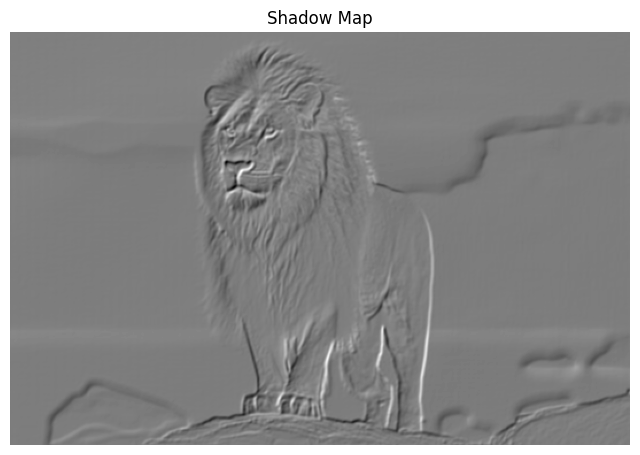

In [ ]:
# prompt: write python code for  an images shadow map

import cv2
import numpy as np

def generate_shadow_map(image, light_direction):
  """
  Generates a shadow map for a given image and light direction.

  Args:
    image: The input image as a NumPy array.
    light_direction: A tuple representing the (x, y, z) direction of the light source.

  Returns:
    A NumPy array representing the shadow map, where darker values indicate deeper shadows.
  """

  # Convert the image to grayscale.
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Calculate the gradient of the grayscale image.
  gradient_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
  gradient_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)

  # Calculate the dot product between the gradient and the light direction.
  dot_product = gradient_x * light_direction[0] + gradient_y * light_direction[1]

  # Normalize the dot product to the range [0, 255].
  shadow_map = cv2.normalize(dot_product, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

  return shadow_map

# Load the image.
image = cv2.imread("/content/drive/MyDrive/LABORATORY /lionimg.jpg")

# Define the light direction.
light_direction = (1, 1, 1)  # Example light direction

# Generate the shadow map.
shadow_map = generate_shadow_map(image, light_direction)

# Display the shadow map.
plt.figure(figsize=(8, 6))
plt.imshow(shadow_map, cmap='gray')
plt.title('Shadow Map')
plt.axis('off')
plt.show()


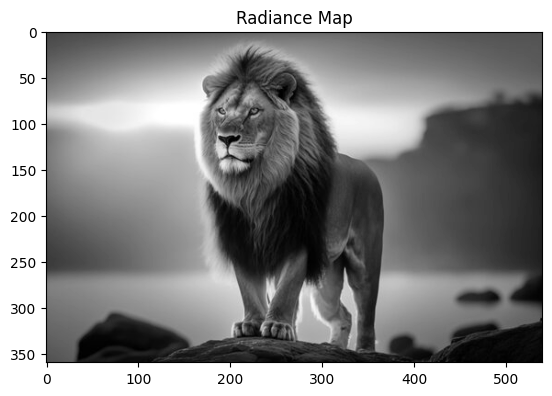

In [ ]:
import cv2
import numpy as np

def calculate_radiance_map(image_path):
  image = cv2.imread(image_path)
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  radiance_map = gray_image.astype(np.float32) / 255.0
  return radiance_map

image_path = "/content/drive/MyDrive/LABORATORY /lionimg.jpg"
radiance_map = calculate_radiance_map(image_path)
import matplotlib.pyplot as plt
plt.imshow(radiance_map, cmap='gray')
plt.title('Radiance Map')
plt.show()

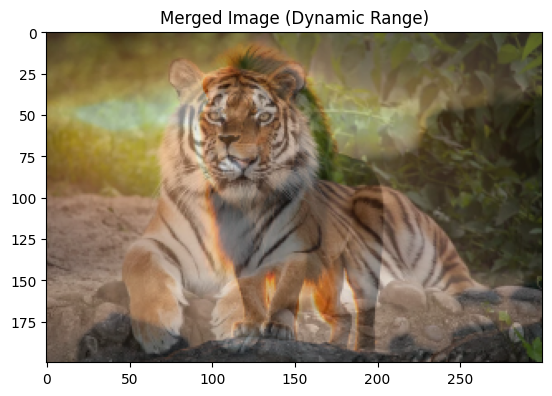

In [ ]:
import cv2
import numpy as np
image1 = resized_image
image2 = resized_image_2

if image1.shape != image2.shape:
  raise ValueError("Images must have the same dimensions.")

image1_float = image1.astype(np.float32) / 255.0
image2_float = image2.astype(np.float32) / 255.0

merged_image_float = (image1_float + image2_float) / 2
merged_image = (merged_image_float * 255).astype(np.uint8)
plt.imshow(cv2.cvtColor(merged_image, cv2.COLOR_BGR2RGB))
plt.title('Merged Image (Dynamic Range)')
plt.show()


##1 C

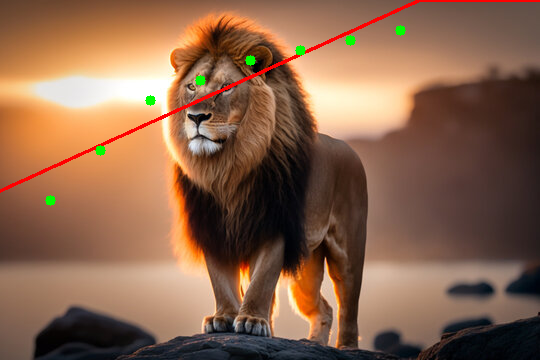

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2
def load_image(image_path):
    return cv2.imread(image_path)

def extract_points(image):
    points = np.array([
        [50, 200], [100, 150], [150, 100], [200, 80],
        [250, 60], [300, 50], [350, 40], [400, 30]
    ])
    return points

def fit_line_ols(points):
    X = points[:, 0]
    Y = points[:, 1]
    A = np.vstack([X, np.ones(len(X))]).T
    m, c = np.linalg.lstsq(A, Y, rcond=None)[0]
    return m, c

def draw_fitted_line(image, m, c):
    height, width = image.shape[:2]
    x = np.linspace(0, width, 1000)
    y = m * x + c
    y = np.clip(y, 0, height - 1)

    for i in range(len(x) - 1):
        cv2.line(image, (int(x[i]), int(y[i])), (int(x[i+1]), int(y[i+1])), (0, 0, 255), 2)
    return image

def main(image_path):
    image = load_image(image_path)
    points = extract_points(image)
    m, c = fit_line_ols(points)

    fitted_image = draw_fitted_line(image, m, c)

    for point in points:
        cv2.circle(fitted_image, tuple(point), 5, (0, 255, 0), -1)

    cv2.imwrite('fitted_image.png', fitted_image)
    cv2_imshow(fitted_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
main('/content/drive/MyDrive/LABORATORY /lionimg.jpg')

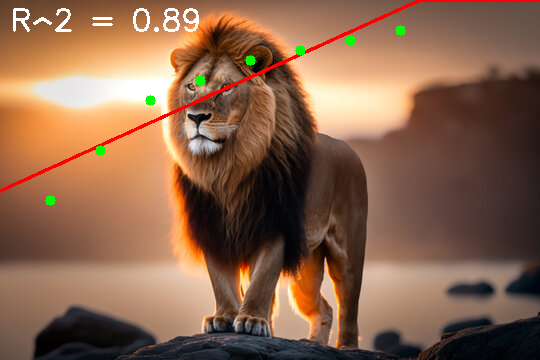

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def load_image(image_path):
    return cv2.imread(image_path)

def extract_points(image):
    # For simplicity, assume points are hardcoded or extracted manually.
    # In a real scenario, you might use image processing to detect points.
    points = np.array([
        [50, 200], [100, 150], [150, 100], [200, 80],
        [250, 60], [300, 50], [350, 40], [400, 30]
    ])
    return points

def fit_line_ols(points):
    X = points[:, 0]
    Y = points[:, 1]
    A = np.vstack([X, np.ones(len(X))]).T
    m, c = np.linalg.lstsq(A, Y, rcond=None)[0]
    return m, c

def calculate_r_squared(points, m, c):
    X = points[:, 0]
    Y = points[:, 1]
    y_pred = m * X + c
    ss_res = np.sum((Y - y_pred) ** 2)
    ss_tot = np.sum((Y - np.mean(Y)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

def draw_fitted_line(image, m, c, r_squared):
    height, width = image.shape[:2]
    x = np.linspace(0, width, 1000)
    y = m * x + c
    y = np.clip(y, 0, height - 1)

    for i in range(len(x) - 1):
        cv2.line(image, (int(x[i]), int(y[i])), (int(x[i+1]), int(y[i+1])), (0, 0, 255), 2)

    text = f'R^2 = {r_squared:.2f}'
    cv2.putText(image, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    return image

def main(image_path):
    image = load_image(image_path)
    points = extract_points(image)
    m, c = fit_line_ols(points)
    r_squared = calculate_r_squared(points, m, c)

    fitted_image = draw_fitted_line(image, m, c, r_squared)

    for point in points:
        cv2.circle(fitted_image, tuple(point), 5, (0, 255, 0), -1)

    cv2.imwrite('fitted_image_with_r_squared.png', fitted_image)
    cv2_imshow(fitted_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage
image_path = '/content/drive/MyDrive/LABORATORY /lionimg.jpg'
main(image_path)

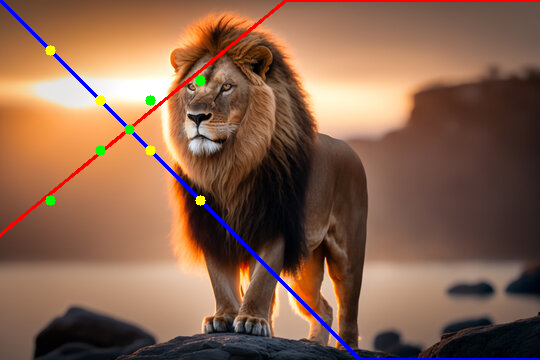

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2,cv2_imshow
def load_image(image_path):
    return cv2.imread(image_path)

def extract_points():
    points1 = np.array([
        [50, 200], [100, 150], [150, 100], [200, 80]
    ])
    points2 = np.array([
        [50, 50], [100, 100], [150, 150], [200, 200]
    ])
    return points1, points2

def fit_line_ols(points):
    X = points[:, 0]
    Y = points[:, 1]
    A = np.vstack([X, np.ones(len(X))]).T
    m, c = np.linalg.lstsq(A, Y, rcond=None)[0]
    return m, c

def calculate_intersection(m1, c1, m2, c2):
    if m1 == m2:
        raise ValueError("Lines are parallel and do not intersect.")

    x = (c2 - c1) / (m1 - m2)
    y = m1 * x + c1
    return x, y

def draw_lines_and_intersection(image, m1, c1, m2, c2, intersection_point):
    height, width = image.shape[:2]
    x = np.linspace(0, width, 1000)
    y1 = m1 * x + c1
    y1 = np.clip(y1, 0, height - 1)
    y2 = m2 * x + c2
    y2 = np.clip(y2, 0, height - 1)

    for i in range(len(x) - 1):
        cv2.line(image, (int(x[i]), int(y1[i])), (int(x[i+1]), int(y1[i+1])), (0, 0, 255), 2)
        cv2.line(image, (int(x[i]), int(y2[i])), (int(x[i+1]), int(y2[i+1])), (255, 0, 0), 2)

    cv2.circle(image, (int(intersection_point[0]), int(intersection_point[1])), 5, (0, 255, 0), -1)
    return image

def main(image_path):
    image = load_image(image_path)
    points1, points2 = extract_points()
    m1, c1 = fit_line_ols(points1)
    m2, c2 = fit_line_ols(points2)
    intersection_point = calculate_intersection(m1, c1, m2, c2)

    fitted_image = draw_lines_and_intersection(image, m1, c1, m2, c2, intersection_point)

    for point in points1:
        cv2.circle(fitted_image, tuple(point), 5, (0, 255, 0), -1)
    for point in points2:
        cv2.circle(fitted_image, tuple(point), 5, (0, 255, 255), -1)

    cv2.imwrite('fitted_image_with_intersection.png', fitted_image)
    cv2_imshow(fitted_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

image_path = '/content/drive/MyDrive/LABORATORY /lionimg.jpg'
main(image_path)

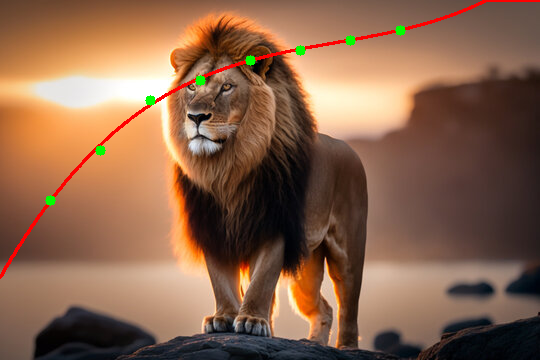

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def load_image(image_path):
    return cv2.imread(image_path)

def extract_points():
    points = np.array([
        [50, 200], [100, 150], [150, 100], [200, 80],
        [250, 60], [300, 50], [350, 40], [400, 30]
    ])
    return points

def fit_polynomial(points, degree):
    X = points[:, 0]
    Y = points[:, 1]
    coefficients = np.polyfit(X, Y, degree)
    return coefficients

def draw_polynomial_curve(image, coefficients):
    height, width = image.shape[:2]
    x = np.linspace(0, width, 1000)
    y = np.polyval(coefficients, x)
    y = np.clip(y, 0, height - 1)

    for i in range(len(x) - 1):
        cv2.line(image, (int(x[i]), int(y[i])), (int(x[i+1]), int(y[i+1])), (0, 0, 255), 2)
    return image

def main(image_path, degree):
    image = load_image(image_path)
    points = extract_points()
    coefficients = fit_polynomial(points, degree)

    fitted_image = draw_polynomial_curve(image, coefficients)

    for point in points:
        cv2.circle(fitted_image, tuple(point), 5, (0, 255, 0), -1)

    cv2.imwrite('fitted_polynomial_curve.png', fitted_image)
    cv2_imshow(fitted_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

image_path = '/content/drive/MyDrive/LABORATORY /lionimg.jpg'
degree = 3
main(image_path, degree)

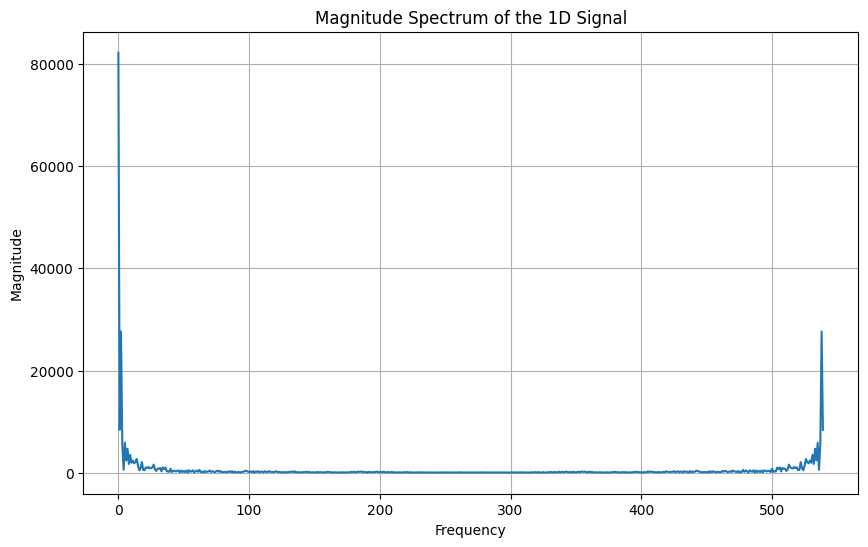

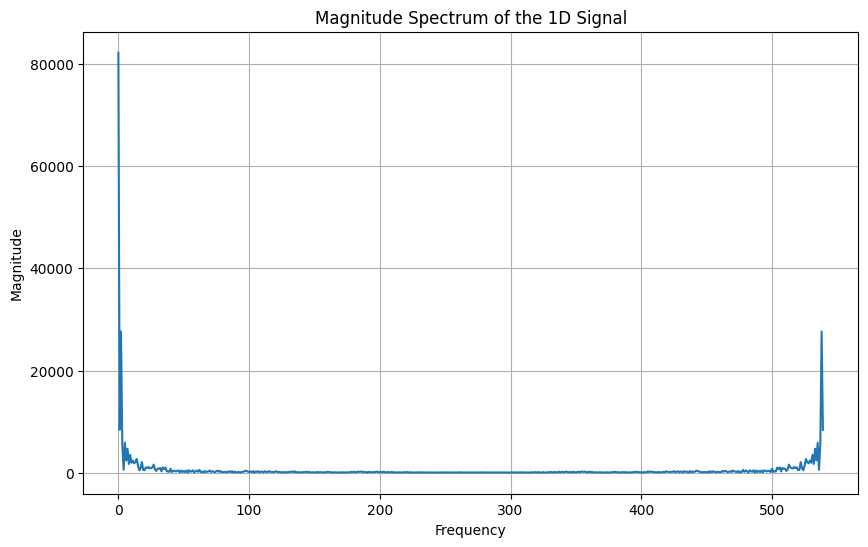

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def load_image(image_path):
    return cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def extract_1d_signal(image, axis=0, index=0):
    if axis == 0:
        signal = image[index, :]
    elif axis == 1:
        signal = image[:, index]
    else:
        raise ValueError("Axis must be 0 (row) or 1 (column).")
    return signal

def calculate_dft(signal):
    dft = np.fft.fft(signal)
    magnitude_spectrum = np.abs(dft)
    return dft, magnitude_spectrum

def plot_spectrum(magnitude_spectrum):
    plt.figure(figsize=(10, 6))
    plt.plot(magnitude_spectrum)
    plt.title('Magnitude Spectrum of the 1D Signal')
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

def main(image_path, axis=0, index=0):
    image = load_image(image_path)
    signal = extract_1d_signal(image, axis, index)
    dft, magnitude_spectrum = calculate_dft(signal)

    plot_spectrum(magnitude_spectrum)

    plt.figure(figsize=(10, 6))
    plt.plot(magnitude_spectrum)
    plt.title('Magnitude Spectrum of the 1D Signal')
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.savefig('magnitude_spectrum.png')

image_path = '/content/drive/MyDrive/LABORATORY /lionimg.jpg'
main(image_path, axis=0, index=100)

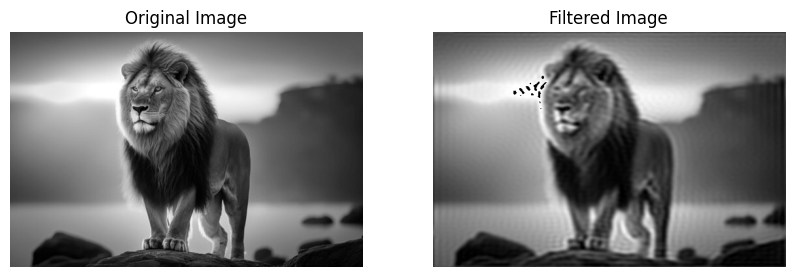

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def load_image(image_path):
    return cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def apply_low_pass_filter(image, cutoff):
    image = np.float32(image)
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x - center[0])**2 + (y - center[1])**2 <= cutoff**2
    mask[mask_area] = 1

    filtered_dft = dft_shift * mask

    idft_shift = np.fft.ifftshift(filtered_dft)
    img_back = np.fft.ifft2(idft_shift)
    img_back = np.abs(img_back)

    img_back = np.uint8(img_back)

    return img_back

def main(image_path, cutoff):
    image = load_image(image_path)
    filtered_image = apply_low_pass_filter(image, cutoff)

    cv2.imwrite('filtered_image.png', filtered_image)

    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Filtered Image')
    plt.imshow(filtered_image, cmap='gray')
    plt.axis('off')

    plt.show()

image_path = '/content/drive/MyDrive/LABORATORY /lionimg.jpg'
cutoff = 50
main(image_path, cutoff)

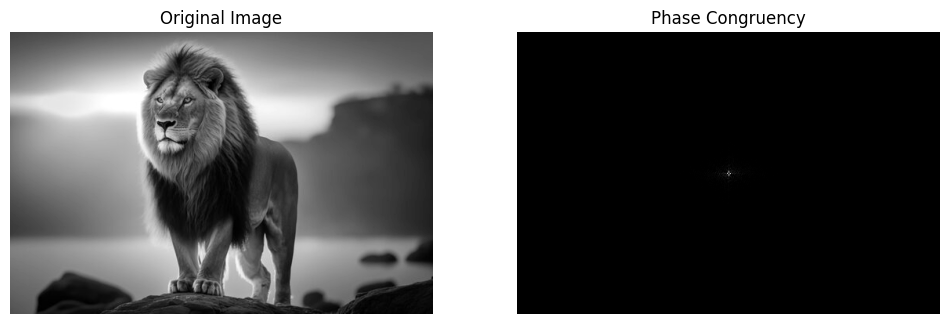

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def load_image(image_path):
    return cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def compute_phase_congruency(image):
    image = np.float32(image)

    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    magnitude = np.abs(dft_shift)
    phase = np.angle(dft_shift)

    phase_congruency = magnitude * (1 - np.cos(phase))

    phase_congruency_normalized = cv2.normalize(phase_congruency, None, 0, 255, cv2.NORM_MINMAX)
    phase_congruency_normalized = np.uint8(phase_congruency_normalized)

    return phase_congruency_normalized

def main(image_path):
    image = load_image(image_path)
    phase_congruency_image = compute_phase_congruency(image)

    cv2.imwrite('phase_congruency.png', phase_congruency_image)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Phase Congruency')
    plt.imshow(phase_congruency_image, cmap='gray')
    plt.axis('off')

    plt.show()

image_path = '/content/drive/MyDrive/LABORATORY /lionimg.jpg'
main(image_path)

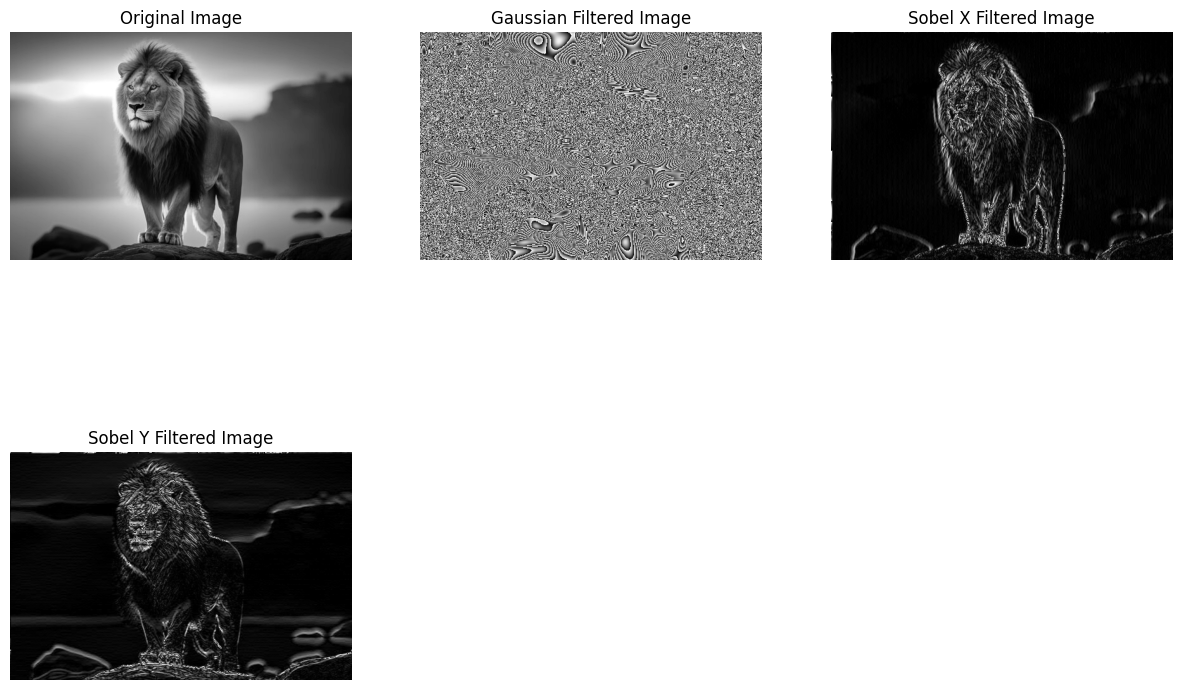

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def load_image(image_path):
    return cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def gaussian_filter(shape, sigma):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x = np.linspace(-ccol, ccol, cols)
    y = np.linspace(-crow, crow, rows)
    X, Y = np.meshgrid(x, y)
    gaussian = np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    return gaussian

def sobel_filter(shape):
    rows, cols = shape
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)

    sobel_x_padded = np.zeros((rows, cols))
    sobel_y_padded = np.zeros((rows, cols))
    sobel_x_padded[:3, :3] = sobel_x
    sobel_y_padded[:3, :3] = sobel_y

    return sobel_x_padded, sobel_y_padded

def apply_filter(image, filter_kernel):
    image = np.float32(image)

    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    filter_kernel = np.fft.fftshift(np.fft.fft2(filter_kernel, s=image.shape))

    filtered_dft = dft_shift * filter_kernel

    idft_shift = np.fft.ifftshift(filtered_dft)
    img_back = np.fft.ifft2(idft_shift)
    img_back = np.abs(img_back)

    img_back = np.uint8(img_back)

    return img_back

def main(image_path):
    image = load_image(image_path)

    gaussian_kernel = gaussian_filter(image.shape, sigma=10)
    gaussian_filtered_image = apply_filter(image, gaussian_kernel)

    sobel_x_kernel, sobel_y_kernel = sobel_filter(image.shape)
    sobel_x_filtered_image = apply_filter(image, sobel_x_kernel)
    sobel_y_filtered_image = apply_filter(image, sobel_y_kernel)

    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.title('Gaussian Filtered Image')
    plt.imshow(gaussian_filtered_image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.title('Sobel X Filtered Image')
    plt.imshow(sobel_x_filtered_image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.title('Sobel Y Filtered Image')
    plt.imshow(sobel_y_filtered_image, cmap='gray')
    plt.axis('off')

    plt.show()

    cv2.imwrite('gaussian_filtered_image.png', gaussian_filtered_image)
    cv2.imwrite('sobel_x_filtered_image.png', sobel_x_filtered_image)
    cv2.imwrite('sobel_y_filtered_image.png', sobel_y_filtered_image)

image_path = '/content/drive/MyDrive/LABORATORY /lionimg.jpg'
main(image_path)